*Data Loading*

In [1]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

No datasets found


In [2]:
! kaggle datasets download -d mirichoi0218/insurance
! unzip insurance.zip
! rm insurance.zip

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 14.2MB/s]
Archive:  insurance.zip
  inflating: insurance.csv           


In [3]:
! kaggle datasets download -d karthickveerakumar/salary-data-simple-linear-regression
! unzip salary-data-simple-linear-regression.zip 
! rm salary-data-simple-linear-regression.zip 

  0% 0.00/378 [00:00<?, ?B/s]
100% 378/378 [00:00<00:00, 743kB/s]
Archive:  salary-data-simple-linear-regression.zip
  inflating: Salary_Data.csv         


*Imports*

In [4]:
import numpy as np
import pandas as pd
import sklearn as sl
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt

In [5]:
x, y = sl.datasets.make_blobs(n_samples=15, centers=3, n_features=1, random_state=0)
# print(x)
# print(y)

[[ 2.33046584]
 [ 6.84898811]
 [ 2.30981546]
 [ 4.78809948]
 [ 3.79791079]
 [ 1.09451291]
 [ 4.88292781]
 [ 1.68079583]
 [ 3.46547215]
 [ 0.13354602]
 [ 2.94619453]
 [ 5.38459924]
 [ 2.24238861]
 [ 1.87368495]
 [-1.29205812]]
[2 1 0 1 1 2 1 2 2 0 0 1 0 2 0]


In [6]:
iris_Dataset = sl.datasets.load_iris()
# iris_Dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

*Insurance Data Linear Regression Modeling*

In [7]:
! wc -l insurance.csv
ins_df = pd.read_csv("insurance.csv")
ins_df.head()

1339 insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
x = np.asarray((ins_df[['age', 'bmi', 'children']]))
y = np.asarray((ins_df['charges'])).reshape(-1, 1)
print(x.shape)
print(y.shape)

(1338, 3)
(1338, 1)


In [9]:
regs = sl.linear_model.LinearRegression()
regsModel = regs.fit(x, y)
predict = regsModel.predict(x)

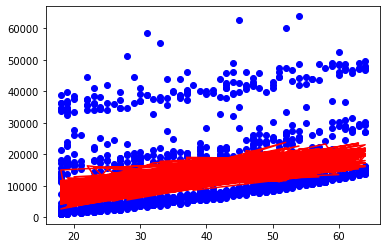

In [10]:
plt.scatter(x[:,0], y, c='b')
plt.plot(x[:,0], predict, c='r')
plt.show()

*Salary Data Linear Regression Modeling*

In [11]:
! wc -l Salary_Data.csv
salary_df = pd.read_csv("Salary_Data.csv")
salary_df.head()

31 Salary_Data.csv


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [12]:
x, y = np.asarray(salary_df['YearsExperience']).reshape(-1, 1), np.asarray(salary_df['Salary']).reshape(-1, 1)
test_x, test_y = x[::3, :], y[::3, :]
train_x, train_y = np.delete(x, [i for i in range(0, 30, 3)]), np.delete(y, [i for i in range(0, 30, 3)])
train_x, train_y = train_x.reshape(-1, 1), train_y.reshape(-1, 1)

In [13]:
print(x.shape)
print(y.shape)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(30, 1)
(30, 1)
(20, 1)
(20, 1)
(10, 1)
(10, 1)


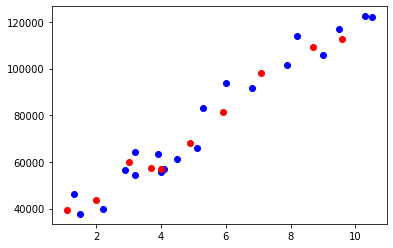

In [14]:
plt.scatter(train_x, train_y, c='b')
plt.scatter(test_x, test_y, c='r')
plt.show()

In [15]:
regs = linear_model.LinearRegression()
regsModel = regs.fit(train_x, train_y)
predict = regsModel.predict(test_x)

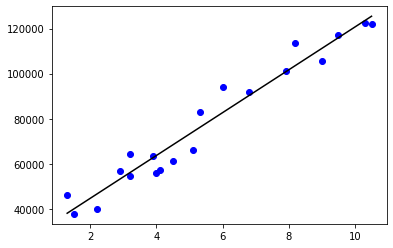

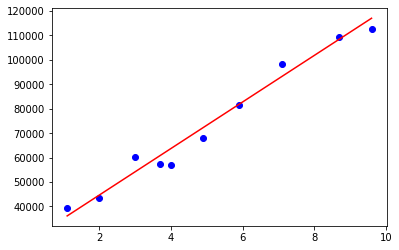

In [16]:
plt.scatter(train_x, train_y, c='b')
plt.plot(train_x, regsModel.predict(train_x), c='k')
plt.show()
print()
plt.scatter(test_x, test_y, c='b')
plt.plot(test_x, predict, c='r')
plt.show()

*New Section*